# 3. Root finding

**Pin number**: 

### Assigning parameters and defining the function $f(x)$

**Question 1.** Assign values to variables PIN, $k$, $N$, $a$, $b$ and $\Delta x$. Define the function $f(x)=\exp(x)-\frac{2kx^2}{2+x^2}$. 

In [47]:
# Assign here values to variables and define the function f(x)=exp(x)-(2kx^2)/(2+x^2)

import numpy as np
PIN = 132
k = 7.5 - PIN/120
N = 64
a = -3.0
b = 3.0
dx = (b-a)/N

def f(x):
    return np.exp(x)-2*k*x**2/(2+x**2)



**Question 2.** Produce a plot of $f(x)$ for $a\leq x\leq b$. Provide appropriate axis labels and plot title as well as add gridlines to the plot. By looking at the graph, estimate the values of $x$ for which $f(x)=0$, i.e., the roots of $f(x)$ and record them by editing the appropriate cell of the JupyterLab worksheet.

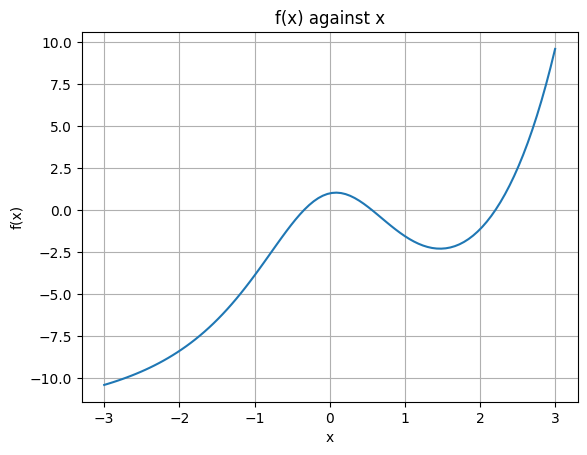

In [48]:
# Create a figure showing f(x) in the range from -3 to 3


import matplotlib.pyplot as plt

xs = np.linspace(-3,3,100)
ys = f(xs)
plt.plot(xs, ys)
plt.ylabel('f(x)')
plt.xlabel('x')
plt.title('f(x) against x')
plt.grid()
plt.show()


Estimated values of roots of $f(x)$ from the graph are:   -0.35, 0.6, 2.2

### Bisection method

**Question 3.** Write a code to find a root of $f(x)$ by means of the Bisection method with starting values $A_0=-3.0$ and $B_0=3.0$ in 20 iterations. Tabulate your results in a table with the following 7 columns: $i$, $A_i$, $C_i$, $B_i$, $f(A_i)$, $f(C_i)$, $f(B_i)$. Provide appropriate header names to the columns.

In [49]:
# Use this cell to write a code for the Bisection method with starting values A_0=-3.0, B_0=3.0 and tabulate your results


A=-3.0
B=3.0

c_s=[]
from tabulate import tabulate

tab= []

for i in range(20):
    C = (A+B)/2
    c_s.append(C)
    tab.append([i, A, C, B,f(A), f(C), f(B) ])

    if f(C)*f(A) <= 0:
        B=C
    else: 
        A=C

    tab.append([])

cols = ['i','Ai','Ci','Bi', 'f(Ai)', 'f(Ci)', 'f(Bi)']

print(tabulate(tab, headers=cols))



    

  i         Ai         Ci         Bi          f(Ai)         f(Ci)        f(Bi)
---  ---------  ---------  ---------  -------------  ------------  -----------
  0  -3          0          3         -10.4229        1            9.61281

  1  -3         -1.5        0         -10.4229       -6.55334      1

  2  -1.5       -0.75       0          -6.55334      -2.33739      1

  3  -0.75      -0.375      0          -2.33739      -0.153587     1

  4  -0.375     -0.1875     0          -0.153587      0.607916     1

  5  -0.375     -0.28125   -0.1875     -0.153587      0.26785      0.607916

  6  -0.375     -0.328125  -0.28125    -0.153587      0.0664099    0.26785

  7  -0.375     -0.351562  -0.328125   -0.153587     -0.0413896    0.0664099

  8  -0.351562  -0.339844  -0.328125   -0.0413896     0.0130753    0.0664099

  9  -0.351562  -0.345703  -0.339844   -0.0413896    -0.0140178    0.0130753

 10  -0.345703  -0.342773  -0.339844   -0.0140178    -0.000436167  0.0130753

 11  -0.342773  -0.34

**Question 4.**  Assume that $C_{20}$ is the true value for a root of $f(x)$. Calculate the absolute value of the error $|C_i-C_{20}|$ for $i\leq 19$ and $\ln|C_i-C_{20}|$. Store your results in appropriate lists (see manual). Create a plot of $\ln|C_i-C_{20}|$ against $i$ with appropriate axis labels and plot title.

/var/folders/21/27_gy57n0s5d93lj2z_tbx580000gn/T/ipykernel_91021/2360107932.py:4: RuntimeWarning: divide by zero encountered in log
  ln_errorBM = [np.log(ele) for ele in errorBM]


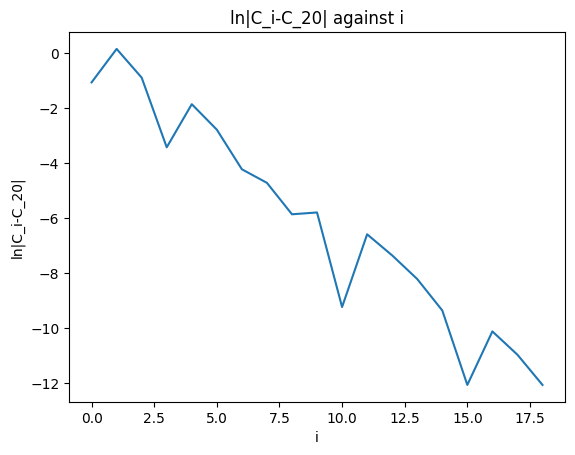

In [50]:
# Use this cell to calculate |C_i-C_20| and ln|C_i-C_20| as well as plot ln|C_i-C_20| against i

errorBM = [abs(ele-C) for ele in c_s ]
ln_errorBM = [np.log(ele) for ele in errorBM]

plt.plot(np.arange(0,20,1), ln_errorBM)
plt.xlabel('i')
plt.ylabel('ln|C_i-C_20|')
plt.title('ln|C_i-C_20| against i')
plt.show()



### Newton-Raphson method

**Question 5.** Define the function $f'(x)=\exp(x)-\frac{8 k x}{(2 + x^2)^2}$. 

Using the starting value $A_0=-3.0$, implement 20 iterations of the Newton-Raphson method. Repeat the Newton-Raphson method for a different starting value $B_0=3.0$.

Assume that $A_{20}$ is the true value of a root of $f(x)$. For $i\leq 20$, calculate the $|A_i-A_{20}|$ and $|B_i-B_{20}|$. Store your results in appropriate lists (see manual).

Tabulate your results in a table with 7 columns: $i$, $A_i$, $|A_i-A_{20}|$, $f(A_i)$, $B_i$, $|B_i-B_{20}|$, $f(B_i)$. Provide appropriate column headers.

After producing a table and looking at the columns containing $|A_i-A_{20}|$ and $|B_i-B_{20}|$, re-edit your computation cell by defining two more lists that store $\ln|A_i-A_{20}|$ and $\ln|B_i-B_{20}|$. Decide on the appropriate range of $i$ in each case.

In [51]:
# Use this cell to implement the Newton-Raphson method and other tasks of Question 5

N = 10

def f_der(x):
    return np.exp(x)-8*k*x/(2+x**2)**2

A = -3.0
a_s =[]

for i in range(N):
    a_s.append(A)
    A = A - f(A)/f_der(A)

print(A)

B = 3.0
b_s=[]

for i in range(N):
    b_s.append(B)
    B = B - f(B)/f_der(B)

print(B)


errorNR_A = [abs(ele-A) for ele in a_s ]
errorNR_B = [abs(ele-B) for ele in b_s ]

ln_errorNR_A = [np.log(ele) for ele in errorNR_A ]
ln_errorNR_B = [np.log(ele) for ele in errorNR_B ]


errors =[]
for i in range(N):


    errors.append([i, a_s[i], ln_errorNR_A[i], f(a_s[i]),  b_s[i], ln_errorNR_B[i] ,f(b_s[i])])

   


cols = ['i', 'Ai', 'ln|A_i − A_20|', 'f(Ai)', 'Bi', 'ln|B_i − B_20|', 'f(Bi)']

print(tabulate(errors, headers=cols))


    

2.2048607986902606
2.2048607986902606
  i        Ai    ln|A_i − A_20|          f(Ai)       Bi    ln|B_i − B_20|        f(Bi)
---  --------  ----------------  -------------  -------  ----------------  -----------
  0  -3               1.64959    -10.4229       3               -0.229238  9.61281
  1   4.9009          0.991785   122.595        2.48912         -1.25787   2.37423
  2   3.98629         0.577417    42.4857       2.25528         -2.98738   0.350576
  3   3.18795        -0.0170604   13.5433       2.20685         -6.22108   0.013278
  4   2.60255        -0.92209      3.61604      2.20486        -12.6319    2.17899e-05
  5   2.29524        -2.40373      0.649054     2.20486        -25.451     5.90141e-11
  6   2.21097        -5.09753      0.0409796    2.20486       -inf         0
  7   2.20489       -10.3897       0.000205117  2.20486       -inf         0
  8   2.20486       -20.9668       5.22919e-09  2.20486       -inf         0
  9   2.20486      -inf            0            2

/var/folders/21/27_gy57n0s5d93lj2z_tbx580000gn/T/ipykernel_91021/935107190.py:30: RuntimeWarning: divide by zero encountered in log
  ln_errorNR_A = [np.log(ele) for ele in errorNR_A ]
/var/folders/21/27_gy57n0s5d93lj2z_tbx580000gn/T/ipykernel_91021/935107190.py:31: RuntimeWarning: divide by zero encountered in log
  ln_errorNR_B = [np.log(ele) for ele in errorNR_B ]


### Linear interpolation method

**Question 6.** Implement the Linear interpolation method with starting values $A_0=-3.0$ and $B_0=3.0$ for the first 20 iterations (i.e., $i\leq 20$).

Assume that $C_{20}$ is a true root of $f(x)$. Calculate $|C_i-C_{20}|$ for $i\leq 20$ and store your results in a appropriate list (see manual). 

Tabulate your results in a table with 7 columns: $i$, $A_i$, $C_i$, $B_i$, $f(A_i)$, $f(C_i)$, $f(B_i)$. Provide appropriate header names to the columns. 

After inspecting the values $f(C_i)$ in your table, calculate the values $\ln|C_i-C_{20}|$ for an appropriate range of $i$. Store your results in a appropriate list (see manual).

In [52]:
# Use this cell to implement the Linear interpolation method and other tasks of Question 6.

A=-3.0
B=3.0

c_s=[]


tab= []

for i in range(20):
    C = A - (B-A)*f(A)/(f(B)-f(A))
    c_s.append(C)
    tab.append([i, A, C, B,f(A), f(C), f(B) ])

    if f(C)*f(A) <= 0:
        B=C
    else: 
        A=C

    tab.append([])


errorLI = [abs(ele-C) for ele in c_s ]

ln_errorLI = [np.log(ele) for ele in errorLI]




cols = ['i','Ai','Ci','Bi', 'f(Ai)', 'f(Ci)', 'f(Bi)']

print(tabulate(tab, headers=cols))

print(ln_errorLI)


  i         Ai         Ci         Bi         f(Ai)         f(Ci)        f(Bi)
---  ---------  ---------  ---------  ------------  ------------  -----------
  0  -3          0.121303   3         -10.4229       1.03548      9.61281

  1  -3         -0.160765   0.121303  -10.4229       0.688191     1.03548

  2  -3         -0.336619  -0.160765  -10.4229       0.0278648    0.688191

  3  -3         -0.343721  -0.336619  -10.4229      -0.00481921   0.0278648

  4  -0.343721  -0.342673  -0.336619   -0.00481921   2.60173e-05  0.0278648

  5  -0.343721  -0.342679  -0.342673   -0.00481921   2.39199e-08  2.60173e-05

  6  -0.343721  -0.342679  -0.342679   -0.00481921   2.19912e-11  2.39199e-08

  7  -0.343721  -0.342679  -0.342679   -0.00481921   2.02061e-14  2.19912e-11

  8  -0.343721  -0.342679  -0.342679   -0.00481921   0            2.02061e-14

  9  -0.343721  -0.342679  -0.342679   -0.00481921   0            0

 10  -0.343721  -0.342679  -0.342679   -0.00481921   0            0

 11  -0.34

/var/folders/21/27_gy57n0s5d93lj2z_tbx580000gn/T/ipykernel_91021/910397718.py:26: RuntimeWarning: divide by zero encountered in log
  ln_errorLI = [np.log(ele) for ele in errorLI]


### Secant method

**Question 7.** Implement the Secant method with the starting values $A_0=-3.0$ and $A_1=3.0$ for the first 20 iterations (see manual for further instructions).

Assume that $A_{20}$ is a true root of $f(x)$. Calculate $|A_i-A_{20}|$ for $i\leq 20$ and store your results in an appropriate list (see manual). 

Tabulate your results in a table with 4 columns: $i$, $A_i$, $|A_i-A_{20}|$, $f(A_i)$. Provide appropriate header names to the columns.

After inspecting the values $|A_i-A_{20}|$ in your table, create another list (see manual) and store in that list the values $\ln|A_i-A_{20}|$ for an appropriate range of $i$.

In [53]:
# Use this cell to implement the Secant method and other tasks of Question 7.
A_i_minus=-3.0
A_i=3.0



a_s=[]



for i in range(20):
    if abs(f(A_i)-f(A_i_minus)) > 10**(-30):
        A_i_plus= A_i - (A_i-A_i_minus)*f(A_i)/(f(A_i)-f(A_i_minus))
        A_i_minus = A_i
        A_i = A_i_plus
        a_s.append(A_i)
        
    else:
        
        break

    tab.append([])


tab = [[i, a_s[i], abs(a_s[i]-A_i), f(a_s[i])] for i in range(len(a_s))]

cols = ['i','Ai','|A_i-A_20|','f(Ai)']

errorSM = [abs(ele-A_i) for ele in a_s]


print(tabulate(tab, headers=cols))

ln_errorSM = [np.log(ele) for ele in errorSM]
print(ln_errorSM)




  i         Ai    |A_i-A_20|         f(Ai)
---  ---------  ------------  ------------
  0   0.121303   0.463982      1.03548
  1  -0.226223   0.116456      0.478181
  2  -0.52441    0.181731     -0.955376
  3  -0.325687   0.0169923     0.0773617
  4  -0.340573   0.00210606    0.00971845
  5  -0.342712   3.2671e-05   -0.000151047
  6  -0.342679   6.10563e-08   2.82272e-07
  7  -0.342679   1.76392e-12   8.1547e-12
  8  -0.342679   5.55112e-17   2.22045e-16
  9  -0.342679   0             0
 10  -0.342679   0             0
[np.float64(-0.7679098304510025), np.float64(-2.15023956516528), np.float64(-1.7052292392977313), np.float64(-4.074997346772311), np.float64(-6.162935117339312), np.float64(-10.329022124259676), np.float64(-16.611469176415536), np.float64(-27.06348118339215), np.float64(-37.42994775023705), np.float64(-inf), np.float64(-inf)]


/var/folders/21/27_gy57n0s5d93lj2z_tbx580000gn/T/ipykernel_91021/2502050786.py:34: RuntimeWarning: divide by zero encountered in log
  ln_errorSM = [np.log(ele) for ele in errorSM]


**Question 8.** Create a scatter plot showing the previously calculated lists storing the natural logarithms of the absolute values of errors against the index $i$ for four root-finding methods (see manual for further instructions). Provide appropriate axis labels and plot title as well as create a legend for your data. Discuss very briefly (3-4 sentences) the convergence behaviour that you observe for different methods in the specifically provided cell in the JupyterLab notebook.

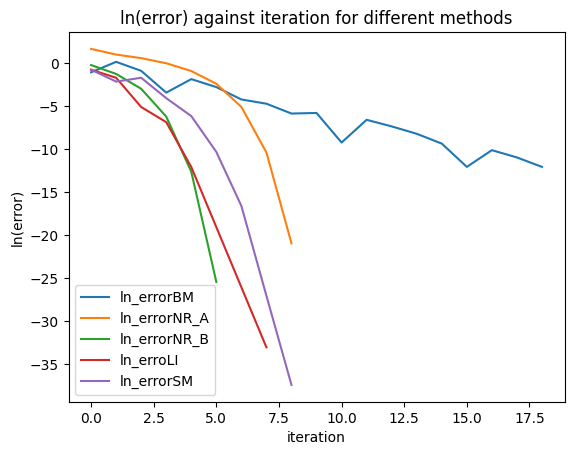

In [55]:
# Use this cell to create a plot of ln|error| against i for all four root-finding methods 
plt.plot(np.arange(0,len(ln_errorBM),1), ln_errorBM, label='ln_errorBM')
plt.plot(np.arange(0,len(ln_errorNR_A),1), ln_errorNR_A, label='ln_errorNR_A')
plt.plot(np.arange(0,len(ln_errorNR_B),1), ln_errorNR_B, label='ln_errorNR_B')
plt.plot(np.arange(0,len(ln_errorLI),1), ln_errorLI, label='ln_erroLI')
plt.plot(np.arange(0,len(ln_errorSM),1), ln_errorSM, label='ln_errorSM')

plt.title('ln(error) against iteration for different methods')
plt.legend()
plt.xlabel('iteration')
plt.ylabel('ln(error)')
plt.show()


Brief comments on the observed convergence behaviour for different methods: Bisection method is slowest to converge and does so linearly.It always works.
Newton raphson converges very quickly if a good guess is made - NR_B converges the fastest of all the methods. Method fails if f_dev(A_i) is close to zero for any i. The secant method converges quickly too but has problems if the derivative of f at any point is near zero. Linear interpolation always works but can be very slow if C_i is close to A_i or B_i.